### 1 m = 3.2808399 ft
### 1 ft = 0.3048 m
### 100 ft $\approx$ 30 m

In [8]:
import geopandas as gpd
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Load

In [4]:
entr = gpd.read_file('./subway_entrances_may2016.shp')
entr.crs
# EPSG:4269 -> http://spatialreference.org/ref/epsg/4269/

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 41.03333333333333,
 u'lat_2': 40.66666666666666,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 u'x_0': 300000.0000000001,
 u'y_0': 0}

[wiki](http://gisgeography.com/geodetic-datums-nad27-nad83-wgs84/)

In [11]:
len(entr)

1868

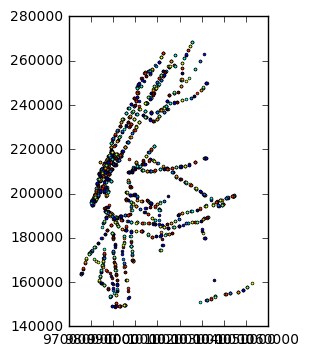

In [12]:
entr.plot()

# Buffer

In [44]:
# entr.geometry.buffer(100)[:20].plot(figsize=(5,5))

In [20]:
entr_buffer = entr.copy()
entr_buffer.geometry = entr.geometry.buffer(100)

In [33]:
entr_buffer.columns

Index([       u'ADA',  u'ADA_Notes',     u'Corner',   u'Division',
       u'East_West_', u'Entrance_T',      u'Entry',  u'Exit_Only',
       u'Free_Cross',      u'GEOID',   u'Latitude',       u'Line',
        u'Longitude',   u'NAMELSAD', u'North_Sout',    u'Route_1',
         u'Route_10',   u'Route_11',    u'Route_2',    u'Route_3',
          u'Route_4',    u'Route_5',    u'Route_6',    u'Route_7',
          u'Route_8',    u'Route_9', u'Staff_Hour',   u'Staffing',
       u'Station_La', u'Station_Lo', u'Station_Na',    u'Vending',
         u'geometry'],
      dtype='object')

In [41]:
entr_buffer.head(20).groupby(entr_buffer['Station_Na']).size()

Station_Na
30 Av-Grand Av          4
36 Av-Washington Av     3
39 Av-Beebe Av          2
Astoria Blvd-Hoyt Av    4
Broadway                3
Ditmars Blvd            4
dtype: int64

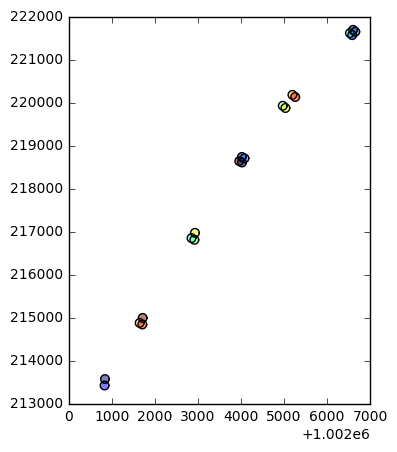

In [42]:
entr_buffer.head(20).plot(figsize=(5,5))

# Output

In [45]:
entr_buffer.to_file('entr_buffer_100_feet_epsg4269_nad83')

In [48]:
entr_buffer.crs

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 41.03333333333333,
 u'lat_2': 40.66666666666666,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 'wktext': True,
 u'x_0': 300000.0000000001,
 u'y_0': 0}

In [60]:
entr_buffer.ix[0]

ADA                                                       FALSE
ADA_Notes                                                  None
Corner                                                       NW
Division                                                    BMT
East_West_                                             23rd Ave
Entrance_T                                                Stair
Entry                                                       YES
Exit_Only                                                  None
Free_Cross                                                 TRUE
GEOID                                                     36081
Latitude                                                40.7751
Line                                                    Astoria
Longitude                                              -73.9121
NAMELSAD                                          Queens County
North_Sout                                              31st St
Route_1                                 